
# Growth in Communication Technologies in different countries of the world from 2007-2016 and comparison with per capita income.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

------------------------------------------------------------------------------------------------------------------
 The world has witnessed a tremendous progress in the field of communication technologies in recent years. Although the technology for tools such as the Internet, the mobile phone, home wireless networks, etc has been available for many years, the rate of diffusion for these technologies has seen significant changes in recent years. For this project, I have chosen to analyse the growth of some communication technologies in different countries throughout the world, based on their per capita income. The datasets have been chosen from Gapminder World. https://www.gapminder.org/data/

Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators. From the website, the datasets are obtained by choosing the following indicators:

Category: Infrastructure,
Sub Category: Communication,
Datasets:                     
                                1. Broadband Subscribers (total)
                                2. Cell Phones (total)
                                3. Internet Users(total)


Category: Economy,
Sub Category: Incomes & Growth,
Dataset:                   
                                4. Income per person (GDP/capita, PPP inflation-adjusted)

The data obtained is investigated and analysed in an attempt to find the answers to the following questions:

1. How do different countries in the world, based on their per capita income, compare in their use of the following communication technologies during the period 2007-2016: Broadband subscribers, Cell phones, Internet users. Is there any relation between the per capita income and the use of these communication technologies?

2. Is there any noticeable trend that can be observed in the use of these communication technologies over the  years between 2007-2016?

In [1]:
# The python libraries necessary for our analysis and visualisations are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

I will load in the data, check for cleanliness, and then trim and clean datasets for analysis in this section.

### General Properties

In [2]:
df_income=pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_broadband=pd.read_csv('broadband_subscribers.csv')
df_cellphones=pd.read_csv('cell_phones_total.csv')
df_internet=pd.read_csv('internet_users.csv')

The required datasets are loaded. There are 4 different datasets relating to distribution of GDP per person, and number of broadband subscribers, cellphones users and internet users for all countries in the world over the years.

I will check if all the four datasets have loaded properly and look at a brief preview of the data in each of the datasets.

In [3]:
df_broadband.head()

,country,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,200.0,220.0,500.0,500.0,500.0,1000.0,1500.0,NaN,1500.0,1500.0,1500.0,7070.0,8800.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,272.0,NaN,10000.0,64000.0,92000.0,106000.0,128000.0,160000.0,183000.0,208000.0,243000.0,266000.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,18000.0,36000.0,135000.0,170000.0,287000.0,485000.0,818000.0,900000.0,981000.0,1150000.0,1280000.0,1600000.0,2270000.0,2860000.0
3,Andorra,NaN,NaN,NaN,NaN,1150.0,3600.0,6280.0,10300.0,14600.0,18500.0,20700.0,22900.0,24500.0,25800.0,26900.0,27700.0,28800.0,30700.0,32500.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7460.0,11700.0,15900.0,15000.0,15000.0,15800.0,20500.0,22300.0,87800.0,154000.0,123000.0


In [4]:
df_cellphones.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,4670000.0,7900000.0,10500000.0,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000,21600000.0
1,Albania,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,2320000.0,1860000.0,2460000.0,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000,3370000.0
2,Algeria,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,27600000.0,27000000.0,32700000.0,32800000.0,35600000.0,37500000.0,39500000.0,43300000.0,43200000,47000000.0
3,Andorra,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,63500.0,64200.0,64500.0,65500.0,65000.0,63900.0,63900.0,66200.0,71300,71100.0
4,Angola,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,4960000.0,6770000.0,8110000.0,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000,13000000.0


In [5]:
df_internet.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,10.6
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.90,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.70,1.90,2.30,2.8,3.1,6.50,8.9,10.2,12.40,13.0


In [6]:
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,1530,1610,1660,1840,1810,1780,1750,1740,1800,1870
1,Albania,667,667,667,667,667,668,668,668,668,...,9530,9930,10200,10400,10500,10700,11000,11400,11900,12400
2,Algeria,715,716,717,718,719,720,721,722,723,...,12600,12900,13000,13200,13300,13500,13700,14000,13800,13700
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,41700,39000,42000,41900,43700,44900,46600,48200,49800,51500
4,Angola,618,620,623,626,628,631,634,637,640,...,5910,5900,5910,6000,6190,6260,6230,6030,5940,5850


**Before starting with analysis I will make data suitable for analysis by performing required cleaning steps. For that, I will perform the following actions:**

1) Check that the structure and format of the dataframes are correct.

2) Filter out the data from the datasets that is not required for analysis:
   
    a) Check that the country names are consistent across the datasets, that is, if there are any country names that do not   appear in all of the datasets, might be decided to remove them as necessary.
    
    b) Remove the data relating to the years that are not relevant for analysis.

3) Make sure that the data is in a format suitable for analysis, for example, data required for numerical analysis must be in a numeric (integer/float) format.

In [7]:
#check the format and shape of the dataframes
df_income.shape

(193, 220)

In [8]:
df_broadband.shape

(192, 20)

In [9]:
df_cellphones.shape

(194, 58)

In [10]:
df_internet.shape

(194, 58)

From the above steps we find that the number of rows is not consistent for the four dataframes, which indicates that the country names are not consistent across them. We will therefore check and find out the list of countries which are not common to all the datasets, and remove them from our analysis purpose. We will then continue our analysis with the list of countries which appear in all the 4 datasets.

For this purpose, there is a function `get_different_rows`. This function takes two dataframes as input parameters(source_df, new_df) and returns the rows from the new_df that differ from the source_df. 

I will apply this function to the country columns in all the 4 dataframes, and obtain the list of countries which do not appear in all the dataframes. We then modify our existing dataframes by removing this list of countries, and proceed with further analysis from thereon.

In [11]:
# define the function to compare two dataframes
def get_different_rows(source_df, new_df):
    """Returns just the rows from the new dataframe that differ from the source dataframe"""
    merged_df = source_df.merge(new_df, indicator=True, how='outer')
    changed_rows_df = merged_df[merged_df['_merge'] == 'right_only']
    return changed_rows_df.drop('_merge', axis=1)

In [12]:
#compare the df_income and df_broadband dataframes
get_different_rows(df_income[['country']],df_broadband[['country']])

,country
193,Liechtenstein


In [13]:
#compare the df_income and df_cellphones dataframes
get_different_rows(df_income[['country']],df_cellphones[['country']])

,country
193,Liechtenstein


In [14]:
#compare the df_income and df_internet dataframes
get_different_rows(df_income[['country']],df_internet[['country']])

,country
193,Liechtenstein


In [15]:
#compare the df_broadband and df_internet dataframes
get_different_rows(df_broadband[['country']],df_internet[['country']])

,country
192,North Korea
193,Sierra Leone


In [16]:
#compare the df_broadband and df_cellphones dataframes
get_different_rows(df_broadband[['country']],df_cellphones[['country']])

,country
192,North Korea
193,Sierra Leone


Thus we have obtained 'Liechtenstein','North Korea','Sierra Leone' as the list of countries for which we do not have data in all the datasets. We therefore decide to drop the rows coresponding to any of these countries from all our datasets and we get the modified dataframes excluding these countries.

In [17]:
df_income = df_income.loc[~df_income['country'].isin(['Liechtenstein','North Korea','Sierra Leone'])]

In [18]:
df_broadband = df_broadband.loc[~df_broadband['country'].isin(['Liechtenstein','North Korea','Sierra Leone'])]

In [19]:
df_cellphones = df_cellphones.loc[~df_cellphones['country'].isin(['Liechtenstein','North Korea','Sierra Leone'])]

In [20]:
df_internet = df_internet.loc[~df_internet['country'].isin(['Liechtenstein','North Korea','Sierra Leone'])]

We then verify if the number of rows is now consistent across all the datasets.

In [21]:
df_income.shape

(191, 220)

In [22]:
df_broadband.shape

(191, 20)

In [23]:
df_cellphones.shape

(191, 58)

In [24]:
df_internet.shape

(191, 58)

The number of rows(country names) is now consistent in all the dataframes.Then I will focus on the columns. For the purpose of analysis, I require data for the years 2007-2016, the other years are not much relevant for this project. I therefore clean datasets further by retaining data for the years 2007-2016, and removing the data corresponding to all other years from all the datasets.

I will start with the income dataset.  

I first filter out the year columns for all years except 2007-2016 and check the properties of this dataset.

In [25]:
df_income = df_income.filter(['country','2007', '2008','2009','2010', '2011','2012','2013','2014','2015','2016'])
df_income.head()

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,1290,1300,1530,1610,1660,1840,1810,1780,1750,1740
1,Albania,8450,9150,9530,9930,10200,10400,10500,10700,11000,11400
2,Algeria,12600,12700,12600,12900,13000,13200,13300,13500,13700,14000
3,Andorra,43400,41400,41700,39000,42000,41900,43700,44900,46600,48200
4,Angola,5440,5980,5910,5900,5910,6000,6190,6260,6230,6030


I will need two new columns to this dataset for analysis purpose - 'AverageIncome' and 'IncomeCategory'.

The 'AverageIncome' column contains the mean value of the income for each country for the years 2007-2016, that is, it is the average value of the data for other columns in that row.

In [26]:
df_income['AverageIncome'] = df_income.mean(axis=1)

In [27]:
df_income.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,AverageIncome
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,16940.801047,17040.282723,16332.188482,16602.811518,16865.492147,17028.340314,17172.701571,17374.486911,17601.204188,17781.345550,17073.965445
std,20086.189436,19711.604292,18536.692201,18803.759034,19133.233951,18975.905485,18899.225043,18942.196328,19150.911489,19190.675015,19075.733188
min,575.000000,591.000000,588.000000,609.000000,614.000000,616.000000,598.000000,602.000000,623.000000,625.000000,617.700000
25%,3120.000000,3245.000000,3245.000000,3330.000000,3405.000000,3485.000000,3575.000000,3645.000000,3410.000000,3455.000000,3372.000000
50%,9280.000000,9720.000000,9580.000000,9930.000000,10100.000000,10400.000000,10600.000000,10900.000000,11100.000000,11400.000000,10224.000000
75%,23050.000000,23800.000000,22100.000000,22050.000000,22700.000000,23100.000000,23400.000000,24100.000000,24450.000000,24500.000000,22950.000000
max,119000.000000,120000.000000,117000.000000,125000.000000,129000.000000,125000.000000,123000.000000,121000.000000,120000.000000,118000.000000,121700.000000


From the above table I see that the minimum per capita Average Income value is 617 dollars, and the maximum is 121700 dollars. The different statistical parameters can also be observed.

The countries are then divided into 5 categories based on their Average per capita Incomes. The 'IncomeCategory' column denotes the category to which this country has been assigned based on its Average Income value. For the purposes of this project, I have chosen to divide the countries into the following 5 categories:

Group5: Countries with per capita average income between $ 500 -5000

Group4: Countries with per capita average income between $ 5000-10000

Group3: Countries with per capita average income between $ 10000-30000

Group2: Countries with per capita average income between $ 30000-50000

Group1: Countries with per capita average income between $ 50000-125000

In [28]:
df_income['IncomeCategory'] = pd.cut(df_income['AverageIncome'], 
                                     bins=[500,5000,10000,30000,50000,125000], include_lowest=True, 
                                     labels=['Group5', 'Group4', 'Group3', 'Group2','Group1'])

In [29]:
df_income.head(10)

,country,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,AverageIncome,IncomeCategory
0,Afghanistan,1290,1300,1530,1610,1660,1840,1810,1780,1750,1740,1631.0,Group5
1,Albania,8450,9150,9530,9930,10200,10400,10500,10700,11000,11400,10126.0,Group3
2,Algeria,12600,12700,12600,12900,13000,13200,13300,13500,13700,14000,13150.0,Group3
3,Andorra,43400,41400,41700,39000,42000,41900,43700,44900,46600,48200,43280.0,Group2
4,Angola,5440,5980,5910,5900,5910,6000,6190,6260,6230,6030,5985.0,Group4
5,Antigua and Barbuda,24200,24000,20800,19100,18600,19100,18900,19500,20100,20800,20510.0,Group3
6,Argentina,17900,18400,17200,18700,19600,19200,19500,18800,19100,18500,18690.0,Group3
7,Armenia,7010,7560,6530,6700,7020,7510,7730,7970,8180,8170,7438.0,Group4
8,Australia,40700,41300,41200,41400,41800,42600,42900,43400,43800,44400,42350.0,Group2
9,Austria,43700,44300,42500,43200,44200,44400,44200,44100,44100,44100,43880.0,Group2


In [30]:
# set the country name as the index of the dataframe
df_income.set_index('country',inplace=True)

In [31]:
df_income.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,AverageIncome,IncomeCategory
country,,,,,,,,,,,,
Afghanistan,1290,1300,1530,1610,1660,1840,1810,1780,1750,1740,1631.0,Group5
Albania,8450,9150,9530,9930,10200,10400,10500,10700,11000,11400,10126.0,Group3
Algeria,12600,12700,12600,12900,13000,13200,13300,13500,13700,14000,13150.0,Group3
Andorra,43400,41400,41700,39000,42000,41900,43700,44900,46600,48200,43280.0,Group2
Angola,5440,5980,5910,5900,5910,6000,6190,6260,6230,6030,5985.0,Group4


In [32]:
df_income.shape

(191, 12)

I now apply a similar procedure to the other three datasets (df_broadband, df_cellphones and df_internet). For each of them, I remove the year columns except from 2007-2016, and reset the country column as index for each.

I will also add the Income Category column from the income dataset to the other three datasets for ease of analysis.

In [33]:
# Broadband dataset is modified according to procedure mentioned
df_broadband = df_broadband.filter(['country','2007', '2008','2009','2010', '2011','2012','2013','2014','2015','2016'])
df_broadband.set_index('country',inplace=True)
df_broadband['IncomeCategory'] = df_income['IncomeCategory']
df_broadband.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,IncomeCategory
country,,,,,,,,,,,
Afghanistan,500.0,500.0,1000.0,1500.0,NaN,1500.0,1500.0,1500.0,7070.0,8800.0,Group5
Albania,10000.0,64000.0,92000.0,106000.0,128000.0,160000.0,183000.0,208000.0,243000.0,266000.0,Group3
Algeria,287000.0,485000.0,818000.0,900000.0,981000.0,1150000.0,1280000.0,1600000.0,2270000.0,2860000.0,Group3
Andorra,18500.0,20700.0,22900.0,24500.0,25800.0,26900.0,27700.0,28800.0,30700.0,32500.0,Group2
Angola,11700.0,15900.0,15000.0,15000.0,15800.0,20500.0,22300.0,87800.0,154000.0,123000.0,Group4


In [34]:
# Cellphones dataset is modified according to procedure mentioned
df_cellphones = df_cellphones.filter(['country','2007', '2008','2009','2010', '2011','2012','2013','2014','2015','2016'])
df_cellphones.set_index('country',inplace=True)
df_cellphones['IncomeCategory'] = df_income['IncomeCategory']
df_cellphones.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,IncomeCategory
country,,,,,,,,,,,
Afghanistan,4670000.0,7900000.0,10500000.0,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000,21600000.0,Group5
Albania,2320000.0,1860000.0,2460000.0,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000,3370000.0,Group3
Algeria,27600000.0,27000000.0,32700000.0,32800000.0,35600000.0,37500000.0,39500000.0,43300000.0,43200000,47000000.0,Group3
Andorra,63500.0,64200.0,64500.0,65500.0,65000.0,63900.0,63900.0,66200.0,71300,71100.0,Group2
Angola,4960000.0,6770000.0,8110000.0,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000,13000000.0,Group4


In [35]:
# Internet dataset is modified according to procedure mentioned
df_internet = df_internet.filter(['country','2007', '2008','2009','2010', '2011','2012','2013','2014','2015','2016'])
df_internet.set_index('country',inplace=True)
df_internet['IncomeCategory'] = df_income['IncomeCategory']
df_internet.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,IncomeCategory
country,,,,,,,,,,,
Afghanistan,1.90,1.84,3.55,4.0,5.0,5.45,5.9,7.0,8.26,10.6,Group5
Albania,15.00,23.90,41.20,45.0,49.0,54.70,57.2,60.1,63.30,66.4,Group3
Algeria,9.45,10.20,11.20,12.5,14.9,18.20,22.5,29.5,38.20,42.9,Group3
Andorra,70.90,70.00,78.50,81.0,81.0,86.40,94.0,95.9,96.90,97.9,Group2
Angola,1.70,1.90,2.30,2.8,3.1,6.50,8.9,10.2,12.40,13.0,Group4




### Data Cleaning 

In this section, I will check the properties of the broadband, cellphones and internet datasets, and find out if there are any data issues that need to be addressed.

In [36]:
df_broadband.shape

(191, 11)

In [37]:
df_broadband.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,IncomeCategory
country,,,,,,,,,,,
Afghanistan,500.0,500.0,1000.0,1500.0,NaN,1500.0,1500.0,1500.0,7070.0,8800.0,Group5
Albania,10000.0,64000.0,92000.0,106000.0,128000.0,160000.0,183000.0,208000.0,243000.0,266000.0,Group3
Algeria,287000.0,485000.0,818000.0,900000.0,981000.0,1150000.0,1280000.0,1600000.0,2270000.0,2860000.0,Group3
Andorra,18500.0,20700.0,22900.0,24500.0,25800.0,26900.0,27700.0,28800.0,30700.0,32500.0,Group2
Angola,11700.0,15900.0,15000.0,15000.0,15800.0,20500.0,22300.0,87800.0,154000.0,123000.0,Group4


In [38]:
df_broadband.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   2007            170 non-null    float64 
 1   2008            177 non-null    float64 
 2   2009            178 non-null    float64 
 3   2010            184 non-null    float64 
 4   2011            179 non-null    float64 
 5   2012            185 non-null    float64 
 6   2013            187 non-null    float64 
 7   2014            186 non-null    float64 
 8   2015            188 non-null    float64 
 9   2016            186 non-null    float64 
 10  IncomeCategory  191 non-null    category
dtypes: category(1), float64(10)
memory usage: 16.8+ KB


Here I can see that in the broadband dataset, there are 191 rows and 10 columns.
However, from ` Non-Null Count` values I can understand all the columns corresponding to the years 2007-2016 contain some missing values.
For every missing value in the dataset, I replace the missing value by the mean of that row which contains the missing value.
For example, when we were checking `df_broadband.head()` in the first row, I can see that for country Afghanistan, the data for the year 2011 is missing. So I replace this missing value by the mean of other values for Afghanistan for the years 2007-2016.
In this way, all the missing values in the dataset is replaced by the mean value of that row corresponding to that country.

In [39]:
#replace null values by mean
df_broadband=df_broadband.T.fillna(df_broadband.mean(axis=1)).T

We now check the properties of the dataset again to see if the missing values have been replaced correctly, and all the required data are in numeric format.

In [40]:
df_broadband.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,IncomeCategory
country,,,,,,,,,,,
Afghanistan,500,500,1000,1500,2652.22,1500,1500,1500,7070,8800,Group5
Albania,10000,64000,92000,106000,128000,160000,183000,208000,243000,266000,Group3
Algeria,287000,485000,818000,900000,981000,1.15e+06,1.28e+06,1.6e+06,2.27e+06,2.86e+06,Group3
Andorra,18500,20700,22900,24500,25800,26900,27700,28800,30700,32500,Group2
Angola,11700,15900,15000,15000,15800,20500,22300,87800,154000,123000,Group4


In [41]:
df_broadband.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   2007            191 non-null    object
 1   2008            191 non-null    object
 2   2009            191 non-null    object
 3   2010            191 non-null    object
 4   2011            191 non-null    object
 5   2012            191 non-null    object
 6   2013            191 non-null    object
 7   2014            191 non-null    object
 8   2015            191 non-null    object
 9   2016            191 non-null    object
 10  IncomeCategory  191 non-null    object
dtypes: object(11)
memory usage: 22.9+ KB


Thus the missing values in the df_broadband dataframe have been correctly replaced by the mean values of each row. However the data is in string format which is not suitable for numerical analysis purpose as scikit-learn or most machine learning estimators are not able to take stings as input. This needs to be converted to a numeric format which is done below.

In [42]:
df_broadband[["2007", "2008","2009", "2010","2011", "2012","2013", "2014","2015", "2016"]] = df_broadband[[
    "2007", "2008","2009", "2010","2011", "2012","2013", "2014","2015", "2016"]].apply(pd.to_numeric)

In [43]:
df_broadband.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2007            191 non-null    float64
 1   2008            191 non-null    float64
 2   2009            191 non-null    float64
 3   2010            191 non-null    float64
 4   2011            191 non-null    float64
 5   2012            191 non-null    float64
 6   2013            191 non-null    float64
 7   2014            191 non-null    float64
 8   2015            191 non-null    float64
 9   2016            191 non-null    float64
 10  IncomeCategory  191 non-null    object 
dtypes: float64(10), object(1)
memory usage: 22.9+ KB


In [44]:
df_broadband.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,IncomeCategory
country,,,,,,,,,,,
Afghanistan,500.0,500.0,1000.0,1500.0,2652.222222,1500.0,1500.0,1500.0,7070.0,8800.0,Group5
Albania,10000.0,64000.0,92000.0,106000.0,128000.000000,160000.0,183000.0,208000.0,243000.0,266000.0,Group3
Algeria,287000.0,485000.0,818000.0,900000.0,981000.000000,1150000.0,1280000.0,1600000.0,2270000.0,2860000.0,Group3
Andorra,18500.0,20700.0,22900.0,24500.0,25800.000000,26900.0,27700.0,28800.0,30700.0,32500.0,Group2
Angola,11700.0,15900.0,15000.0,15000.0,15800.000000,20500.0,22300.0,87800.0,154000.0,123000.0,Group4


Hence the missing values have been correctly replaced and the broadband dataset is clean for further analysis.


I now apply a similar procedure to the other two datasets. 
- The datasets are cleaned by replacing the missing values by the mean value for each row corresponding to that country. 
- Any non-numeric/string values are converted to numeric values.

In [45]:
# Checking the properties of the Cell Phones dataset. 
df_cellphones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   2007            188 non-null    float64 
 1   2008            186 non-null    float64 
 2   2009            187 non-null    float64 
 3   2010            190 non-null    float64 
 4   2011            189 non-null    float64 
 5   2012            190 non-null    float64 
 6   2013            189 non-null    float64 
 7   2014            189 non-null    float64 
 8   2015            191 non-null    int64   
 9   2016            189 non-null    float64 
 10  IncomeCategory  191 non-null    category
dtypes: category(1), float64(9), int64(1)
memory usage: 16.8+ KB


In [46]:
# replace missing values by mean
df_cellphones=df_cellphones.T.fillna(df_cellphones.mean(axis=1)).T 

In [47]:
df_cellphones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   2007            191 non-null    object
 1   2008            191 non-null    object
 2   2009            191 non-null    object
 3   2010            191 non-null    object
 4   2011            191 non-null    object
 5   2012            191 non-null    object
 6   2013            191 non-null    object
 7   2014            191 non-null    object
 8   2015            191 non-null    object
 9   2016            191 non-null    object
 10  IncomeCategory  191 non-null    object
dtypes: object(11)
memory usage: 22.9+ KB


In [48]:
#convert string values to numeric data
df_cellphones[["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016"]] = df_cellphones[["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016"]].apply(pd.to_numeric)

In [49]:
df_cellphones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2007            191 non-null    float64
 1   2008            191 non-null    float64
 2   2009            191 non-null    float64
 3   2010            191 non-null    float64
 4   2011            191 non-null    float64
 5   2012            191 non-null    float64
 6   2013            191 non-null    float64
 7   2014            191 non-null    float64
 8   2015            191 non-null    int64  
 9   2016            191 non-null    float64
 10  IncomeCategory  191 non-null    object 
dtypes: float64(9), int64(1), object(1)
memory usage: 22.9+ KB


In [50]:
df_cellphones.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,IncomeCategory
country,,,,,,,,,,,
Afghanistan,4670000.0,7900000.0,10500000.0,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000,21600000.0,Group5
Albania,2320000.0,1860000.0,2460000.0,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000,3370000.0,Group3
Algeria,27600000.0,27000000.0,32700000.0,32800000.0,35600000.0,37500000.0,39500000.0,43300000.0,43200000,47000000.0,Group3
Andorra,63500.0,64200.0,64500.0,65500.0,65000.0,63900.0,63900.0,66200.0,71300,71100.0,Group2
Angola,4960000.0,6770000.0,8110000.0,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000,13000000.0,Group4


Thus I have checked that the Cellphones data has been made ready for analysis. 

I now repeat the process for the Internet Users data.

In [51]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   2007            188 non-null    float64 
 1   2008            187 non-null    float64 
 2   2009            186 non-null    float64 
 3   2010            186 non-null    float64 
 4   2011            189 non-null    float64 
 5   2012            186 non-null    float64 
 6   2013            188 non-null    float64 
 7   2014            188 non-null    float64 
 8   2015            188 non-null    float64 
 9   2016            188 non-null    float64 
 10  IncomeCategory  191 non-null    category
dtypes: category(1), float64(10)
memory usage: 16.8+ KB


In [52]:
# replace missing values by mean
df_internet=df_internet.T.fillna(df_internet.mean(axis=1)).T

In [53]:
#convert data to numeric format
df_internet[["2007", "2008","2009", "2010","2011", "2012","2013", "2014","2015", "2016"]] = df_internet[["2007", "2008","2009", "2010","2011", "2012","2013", "2014","2015", "2016"]].apply(pd.to_numeric)

In [54]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, Afghanistan to Zimbabwe
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2007            190 non-null    float64
 1   2008            190 non-null    float64
 2   2009            190 non-null    float64
 3   2010            190 non-null    float64
 4   2011            190 non-null    float64
 5   2012            190 non-null    float64
 6   2013            190 non-null    float64
 7   2014            190 non-null    float64
 8   2015            190 non-null    float64
 9   2016            190 non-null    float64
 10  IncomeCategory  191 non-null    object 
dtypes: float64(10), object(1)
memory usage: 22.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

In this section we will explore the data and try to find answers to reaearch questions.

> **Research Question 1 :**
How do different countries in the world, based on their per capita income, compare in their use of the following communication technologies (broadband subscribers, cell phones and internet users) in the last decade (2007-2016)?  Is there any relation between the per capita income and the use of communication technologies?

Now that I have cleaned the data for processing, I will proceed to replace the country name in each of the datasets by the corresponding Income Category to which it belongs. 
This is done for ease of calculation, as my analysis is related to the analysis of communication trends based on the categories of Income Groups, rather than specific countries individually.

I first substitute the country names by the Income Category for the broadband dataset, and then find the mean values of broadband numbers for each of the Groups for the years 2007-2016.

In [55]:
df_broadband.set_index('IncomeCategory',inplace=True)

In [56]:
df_broadband.head(10)

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
IncomeCategory,,,,,,,,,,
Group5,5.000000e+02,500.0,1000.0,1500.0,2.652222e+03,1500.0,1500.0,1500.0,7070.0,8800.0
Group3,1.000000e+04,64000.0,92000.0,106000.0,1.280000e+05,160000.0,183000.0,208000.0,243000.0,266000.0
Group3,2.870000e+05,485000.0,818000.0,900000.0,9.810000e+05,1150000.0,1280000.0,1600000.0,2270000.0,2860000.0
Group2,1.850000e+04,20700.0,22900.0,24500.0,2.580000e+04,26900.0,27700.0,28800.0,30700.0,32500.0
Group4,1.170000e+04,15900.0,15000.0,15000.0,1.580000e+04,20500.0,22300.0,87800.0,154000.0,123000.0
Group3,2.270000e+03,4990.0,16000.0,7120.0,6.000000e+03,13100.0,15600.0,10800.0,10000.0,9260.0
Group3,2.600000e+06,3110000.0,3510000.0,4030000.0,4.570000e+06,5150000.0,6250000.0,6520000.0,6860000.0,7230000.0
Group4,3.900000e+03,13800.0,39900.0,93600.0,1.610000e+05,212000.0,243000.0,273000.0,286000.0,299000.0
Group2,6.006667e+06,5320000.0,5220000.0,5510000.0,5.550000e+06,5740000.0,5980000.0,6540000.0,6830000.0,7370000.0


In [57]:
df_broadband_groups=df_broadband.groupby('IncomeCategory').mean()

In [58]:
df_broadband_groups

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
IncomeCategory,,,,,,,,,,
Group1,7.712160e+06,8.318690e+06,8.670940e+06,9.165250e+06,9.586810e+06,1.003931e+07,1.043635e+07,1.063081e+07,1.110308e+07,1.152827e+07
Group2,5.278484e+06,5.756228e+06,6.179022e+06,6.533831e+06,6.849246e+06,7.078117e+06,7.324872e+06,7.590835e+06,7.875682e+06,8.121353e+06
Group3,1.877983e+06,2.439118e+06,3.043659e+06,3.644198e+06,4.393354e+06,4.937034e+06,5.387800e+06,5.750347e+06,7.202681e+06,8.107711e+06
Group4,1.289667e+05,2.068083e+05,2.998894e+05,4.092667e+05,4.509092e+05,5.285834e+05,6.093182e+05,6.776852e+05,8.635482e+05,1.001986e+06
Group5,8.096504e+04,1.347447e+05,2.043398e+05,2.742467e+05,3.281533e+05,3.837077e+05,4.169794e+05,4.946096e+05,5.871907e+05,7.121449e+05


We apply a similar process as above to the cellphones and internet datasets. We first substitute the country names by the Income Category for each dataset, and then find the mean values of cellphones/internet numbers for each of the Groups 1-5 for the years 2007-2016.

In [59]:
df_internet.set_index('IncomeCategory',inplace=True)

In [60]:
df_internet_groups=df_internet.groupby('IncomeCategory').mean()

In [61]:
df_internet_groups

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
IncomeCategory,,,,,,,,,,
Group1,62.980000,65.760000,68.770000,73.700000,75.850000,79.050000,83.150000,85.220000,86.070000,89.020000
Group2,59.559286,63.222143,66.493929,69.113393,72.460714,74.991964,77.556250,79.145536,80.459821,82.320536
Group3,28.162000,32.018833,35.995259,40.138333,43.793333,48.090222,51.578333,55.161667,58.751667,61.685000
Group4,11.168966,13.658621,16.772759,20.851724,24.055172,26.993448,30.279310,33.352069,37.404138,40.304138
Group5,4.477135,5.449881,6.460833,7.815825,9.206706,10.832738,12.734286,15.527778,18.411746,20.806032


In [62]:
df_cellphones.set_index('IncomeCategory',inplace=True)

In [63]:
df_cellphones_groups=df_cellphones.groupby('IncomeCategory').mean()

In [64]:
df_cellphones_groups

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
IncomeCategory,,,,,,,,,,
Group1,2.796614e+07,2.949380e+07,3.119760e+07,3.258754e+07,3.407898e+07,3.522342e+07,3.632425e+07,4.100377e+07,4.359340e+07,4.516503e+07
Group2,2.402014e+07,2.527934e+07,2.611444e+07,2.642936e+07,2.747520e+07,2.805518e+07,2.861731e+07,2.896489e+07,2.924032e+07,2.986492e+07
Group3,2.460290e+07,2.867172e+07,3.215142e+07,3.545298e+07,3.864451e+07,4.179604e+07,4.517381e+07,4.661710e+07,4.677156e+07,4.810103e+07
Group4,1.271248e+07,1.656713e+07,1.923416e+07,2.273001e+07,2.574550e+07,2.870434e+07,3.081737e+07,3.188913e+07,3.298998e+07,3.442544e+07
Group5,8.066883e+06,1.201062e+07,1.633859e+07,2.156401e+07,2.575668e+07,2.672580e+07,2.841492e+07,3.100323e+07,3.260727e+07,3.528996e+07


I will now proceed with the visualisation of data using the tables obtained above.

**Plot number 1 showing the comparison between the number of broadband users for each group of countries, for years 2007-2016.**

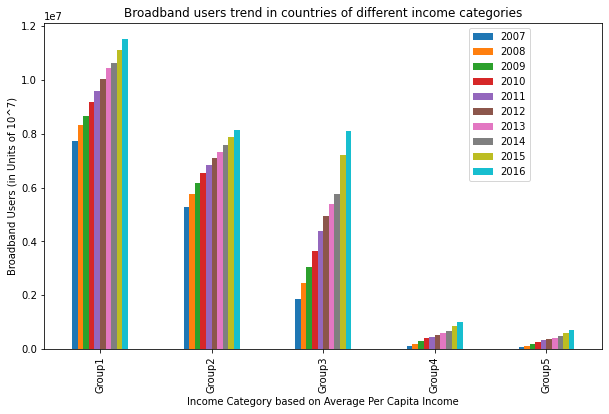

In [65]:
df_broadband_groups.plot(kind='bar',figsize=(10,6));
plt.title('Broadband users trend in countries of different income categories');
plt.xlabel('Income Category based on Average Per Capita Income')
plt.ylabel('Broadband Users (in Units of 10^7)');
plt.legend(bbox_to_anchor=(0.88,1.0005),loc="best");

**Plot number 2 showing the comparison between the number of cellphones users for each group of countries, for years 2007-2016.**

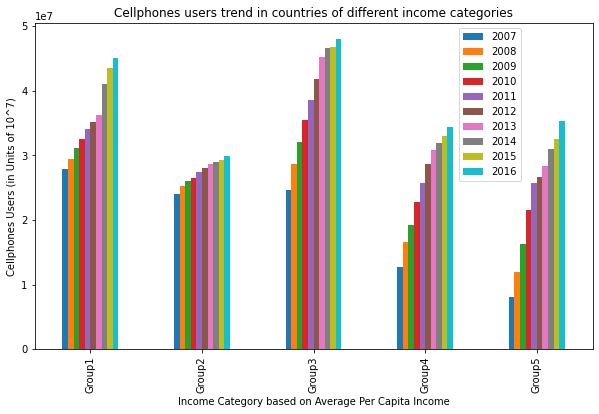

In [66]:
df_cellphones_groups.plot(kind='bar',figsize=(10,6));
plt.title('Cellphones users trend in countries of different income categories');
plt.xlabel('Income Category based on Average Per Capita Income')
plt.ylabel('Cellphones Users (in Units of 10^7)');
plt.legend(bbox_to_anchor=(0.88,1.0005),loc="best");

**Plot number 3 showing the comparison between the number of internet users for each group of countries, for years 2007-2016.**

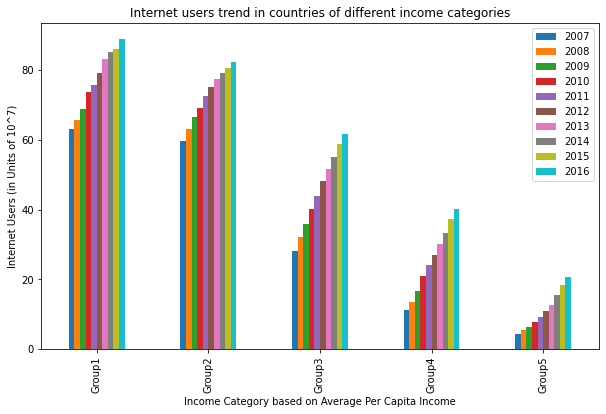

In [67]:
df_internet_groups.plot(kind='bar',figsize=(10,6));
plt.title('Internet users trend in countries of different income categories');
plt.xlabel('Income Category based on Average Per Capita Income');
plt.ylabel('Internet Users (in Units of 10^7)');

#### Results:

From the above analysis and plots, we can conclude that:

1. In terms of broadband use, Group 1 countries (countries with the highest per capita average income) has always ranked the highest. The number of broadband users decreases as the per capita average income decreases, and Group 5 countries (countries with the lowest per capita average income) has the least number of broadband users for all years. The number of broadband users in Group 1 countries is significantly (approximately 20 times) higher than Group 5 countries. The trend shows a decreasing trend of broadband users from higher income countries to lower income countries.
   
   

2. In terms of cellphones use, we observe less significant differences than broadband use. Here, Group 3 countries are observed to have the most number of users, followed by Group 1 countries, although the difference margin is smaller. Thus medium income countries (average per capita income 10000-30000) have recorded highest number of cell phone users. This is followed by Group 2, Group 4, and Group 5 countries, and we can observe that the difference in number of cellphone users has reduced, with Group 4 and 5 exceeding Group 2 for the last two years.
   
   

3. Internet user trends follow a similar trend to broadband use. Group 1 countries with the highest per capita income have highest number of users, and the number of users falls with the country's per capita income. Group 5 countries with the lowest per capita income have recorded lowest number of users. The difference is appreciable. 


> **Research Question 2:**
Is there any noticeable trend that can be observed in the use of these communication technologies over the years between 2007-2016?

**Plot number 4 showing the relative growth between the number of broadband users for years 2007-2016.**

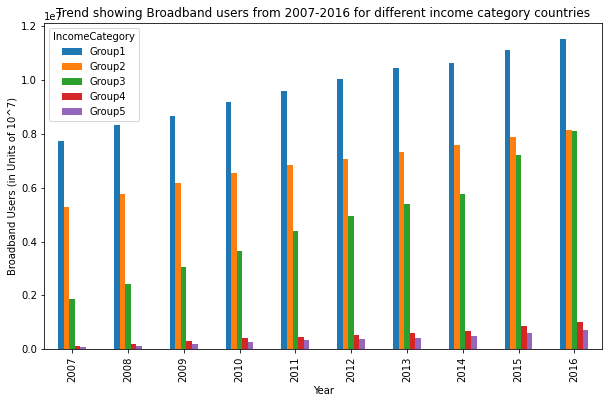

In [68]:
df_broadband_groups.T.plot(kind='bar',figsize=(10,6));
plt.title('Trend showing Broadband users from 2007-2016 for different income category countries');
plt.xlabel('Year');
plt.ylabel('Broadband Users (in Units of 10^7)');

**Plot number 5 showing the relative growth between the number of cellphone users for years 2007-2016.**

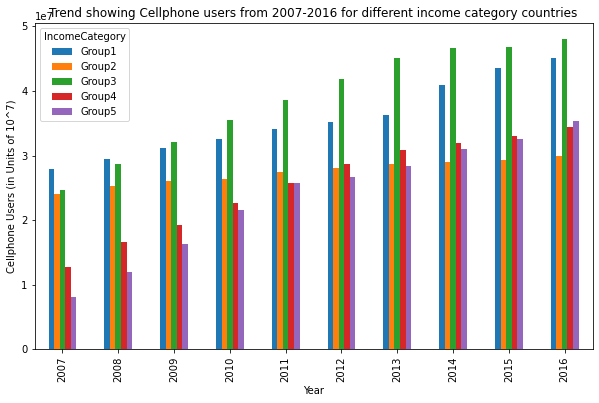

In [69]:
df_cellphones_groups.T.plot(kind='bar',figsize=(10,6));
plt.title('Trend showing Cellphone users from 2007-2016 for different income category countries');
plt.xlabel('Year');
plt.ylabel('Cellphone Users (in Units of 10^7)');

**Plot number 6 showing the relative growth between the number of internet users for years 2007-2016.**

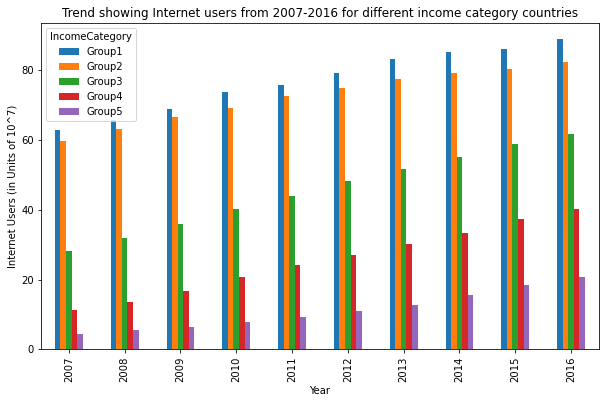

In [70]:
df_internet_groups.T.plot(kind='bar',figsize=(10,6));
plt.title('Trend showing Internet users from 2007-2016 for different income category countries');
plt.xlabel('Year');
plt.ylabel('Internet Users (in Units of 10^7)');

#### Results:

From the above analysis and Plots 4,5 and 6 we can observe that the number of broadband, cellphones and internet users has maintained an increasing trend every year from 2007-2016. This is consistent for countries in all income groups and for all communication means, but the trend is more pronounced in the earlier years of the decade compared to the later years.

### Conclusions

Thus in this project we have gained some insights on the growing use of communication technologies throughout the world, and seen how it compares with the country's GDP. However, we should keep in mind that the findings are not exhaustive, we have not considered other factors like population density, political situation, geographical constraints, etc. Thus a change in a country's per capita income may not necessarily impact the use of communication technologies, or vice versa.

### Supplementary Analysis

Additionally, from earlier analysis in the Data Wrangling section, I have presented below the segmentation of the countries into different income categories for this project, along with the number of countries in each Group and their names.

**Countries categorised according to their averge per capita income as follows:**

In [71]:
df_income_categories=df_income['IncomeCategory'].value_counts()
df_income_categories

Group5    63
Group3    61
Group4    29
Group2    28
Group1    10
Name: IncomeCategory, dtype: int64

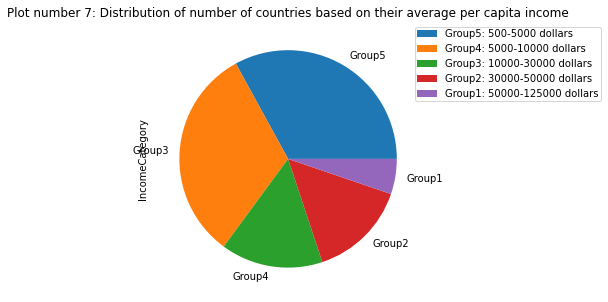

In [72]:
df_income_categories.plot(kind='pie',figsize=(5,5));

plt.title('Plot number 7: Distribution of number of countries based on their average per capita income');
pieLabels = ['Group5: 500-5000 dollars',
             'Group4: 5000-10000 dollars',
             'Group3: 10000-30000 dollars',
             'Group2: 30000-50000 dollars',
             'Group1: 50000-125000 dollars'] 

plt.legend(pieLabels,borderpad=.2,bbox_to_anchor=(0.95,1.005),loc="best");

**We also obtain a list of countries in each category:**

In [73]:
df_income=df_income.reset_index()

In [74]:
for x in range(1,6):
    print("\n The Group {} countries are : \n{}"
          .format(x, df_income['country'][df_income['IncomeCategory'] == "Group{}".format(x)].tolist()))


 The Group 1 countries are : 
['Brunei', 'Kuwait', 'Luxembourg', 'Monaco', 'Norway', 'Qatar', 'Singapore', 'Switzerland', 'United Arab Emirates', 'United States']

 The Group 2 countries are : 
['Andorra', 'Australia', 'Austria', 'Bahrain', 'Belgium', 'Canada', 'Cyprus', 'Denmark', 'Equatorial Guinea', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Malta', 'Netherlands', 'New Zealand', 'Oman', 'San Marino', 'Saudi Arabia', 'South Korea', 'Spain', 'Sweden', 'Trinidad and Tobago', 'United Kingdom']

 The Group 3 countries are : 
['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Azerbaijan', 'Bahamas', 'Barbados', 'Belarus', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', 'Dominica', 'Dominican Republic', 'Estonia', 'Gabon', 'Greece', 'Grenada', 'Hungary', 'Iran', 'Iraq', 'Kazakhstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Mala